In [1]:

import matplotlib.pyplot as plt
import torchvision
import cv2
import numpy as np
from PIL import Image
import random
import torch
import torchvision.transforms as transforms

from M18K.Models.MaskRCNN import MaskRCNN
from M18K.Data.Dataset import M18KDataset

In [2]:
ds = M18KDataset(root="../M18K/Data/test",transforms=None,train=False, depth=False)

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [3]:
model = MaskRCNN.load_from_checkpoint("../runs/maskrcnn_resnet50_fpn_v2/maskrcnn_resnet50_fpn_v2-epoch=398-val_loss=0.0557.ckpt",depth=False)
model.eval()

MaskRCNN(
  (model): MaskRCNN(
    (transform): GeneralizedRCNNTransform(
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        Resize(min_size=(800,), max_size=1333, mode='bilinear')
    )
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): BatchNorm2d(64, eps=1e-05, momentum=

In [4]:
image, _ = ds[random.sample(range(len(ds)),1)[0]]
preds = model.model(image.unsqueeze(0))[0]

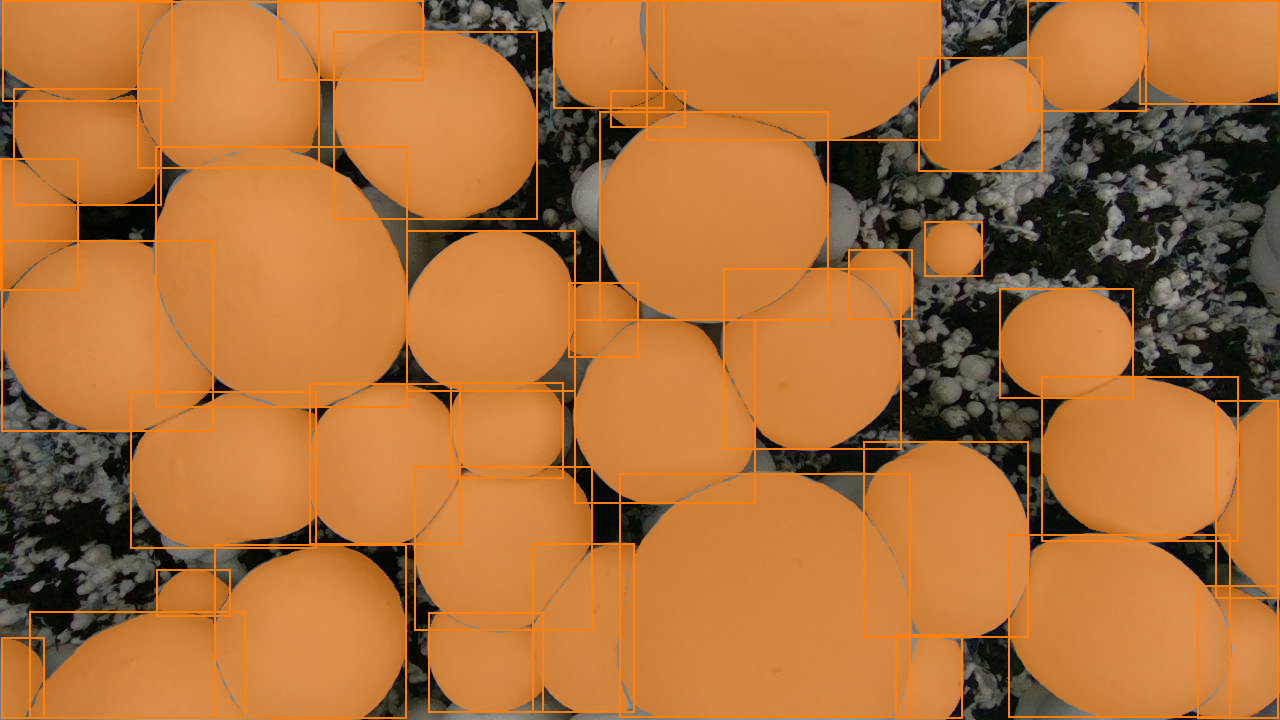

In [13]:
image_uint8 = transforms.ConvertImageDtype(torch.uint8)(image)
colors = [(31, 119, 180) if x == 1 else (255, 127, 15) for x in preds["labels"]]
masks = preds["masks"].squeeze(1) > 0.5
visualized = torchvision.utils.draw_bounding_boxes(image_uint8, boxes=preds["boxes"], colors=colors, width=2)
visualized = torchvision.utils.draw_segmentation_masks(visualized, masks=masks, alpha=0.6, colors=colors)
visualized = visualized.permute(1, 2, 0).numpy().astype(np.uint8)
Image.fromarray(visualized)